<a href="https://colab.research.google.com/github/nehalmuthu/Covid-Simulation-in-Federated-Environment/blob/master/processingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from scipy.io import savemat
import matplotlib.pyplot as plt

In [3]:
def create_df(s1,s2,df,stateList):
  s=pd.concat([s1, s2], ignore_index=True)
  us=s.fillna(0)

  #take only US states
  #us=us[us['sub_region_1']!=0]
  #us=us[us['sub_region_2']==0]

  us=us[us['sub_region_1'].isin(stateList)]
  us=us[us['sub_region_2']==0]

  #covid cases in US
  USCases=df.fillna(0)
  USCases=USCases[USCases['state'].isin(stateList)]

  #to match columns on merge
  USCases.columns=["date",	"sub_region_1",	'fips', 'cases', 'deaths']

  dat= pd.merge(us, USCases, on=['sub_region_1', 'date'],how='inner')

  #converting cumulative to day wise number
  infect=np.array(dat.cases)
  for i in range(len(infect)-1,0,-1):
    infect[i]=infect[i]-infect[i-1]

  infect=infect[1:]
  
  #day 1 removed to equal it to infect list
  dat=dat[1:]  
  dat=dat.reset_index()
  dat=dat.drop('index',axis=1)
  dat.cases=np.array(infect)
						

  return dat



In [4]:
s1=pd.read_csv('/content/gdrive/MyDrive/FedLearningCovid/newideas/data/2020_US_Region_Mobility_Report.csv')
s2=pd.read_csv('/content/gdrive/MyDrive/FedLearningCovid/newideas/data/2021_US_Region_Mobility_Report.csv')
df=pd.read_csv('/content/gdrive/MyDrive/FedLearningCovid/newideas/data/us-states.csv')
   

In [5]:
#get the list of states
l=list(set(s1.sub_region_1.unique()).intersection(df.state.unique()))
l.sort()

In [22]:
#merging all states together after processing
fin=create_df(s1,s2,df,["Alabama"])
for i in range(1,len(l)):
  temp = create_df(s1,s2,df,[l[i]])
  if len(temp)>0:
    fin=pd.concat([fin, temp], ignore_index=True)
    print(l[i])
  else:
    print('FAIL',l[i])

Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


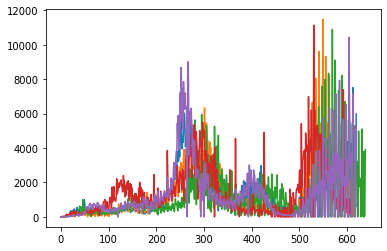

In [23]:
st=[
'Colorado',
'Kentucky',
'Washington',
'Alabama',
'Minnesota'
]
import matplotlib.pyplot as plt
for i in st:
  nam=i
  plt.plot(list(fin[fin['sub_region_1']==nam].cases))

In [24]:
fin

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,fips,cases,deaths
0,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-03-14,1.0,28.0,55.0,12.0,4.0,0.0,1,6,0
1,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-03-15,-7.0,16.0,16.0,6.0,-4.0,2.0,1,11,0
2,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-03-16,-2.0,24.0,22.0,2.0,-10.0,4.0,1,6,0
3,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-03-17,-11.0,17.0,25.0,-1.0,-17.0,7.0,1,10,0
4,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-03-18,-13.0,13.0,39.0,-3.0,-22.0,8.0,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31674,US,United States,Wyoming,0,0.0,US-WY,0.0,ChIJaS7hSDTiXocRLzh90nkisCY,2021-11-11,-3.0,-5.0,2.0,14.0,-26.0,6.0,56,0,1298
31675,US,United States,Wyoming,0,0.0,US-WY,0.0,ChIJaS7hSDTiXocRLzh90nkisCY,2021-11-12,-8.0,-8.0,7.0,20.0,-15.0,4.0,56,785,1298
31676,US,United States,Wyoming,0,0.0,US-WY,0.0,ChIJaS7hSDTiXocRLzh90nkisCY,2021-11-13,-2.0,-8.0,4.0,21.0,-11.0,2.0,56,0,1298
31677,US,United States,Wyoming,0,0.0,US-WY,0.0,ChIJaS7hSDTiXocRLzh90nkisCY,2021-11-14,-2.0,-11.0,-5.0,9.0,-11.0,2.0,56,0,1298


In [11]:
fin.to_csv('processed_US_data.csv',index=False)